In [1]:
# arrange an instance segmentation model for test
from sahi.utils.yolov8 import (
    download_yolov8s_model, download_yolov8s_seg_model
)

from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

In [2]:
import os
p = os.getcwd()

In [3]:
#download YOLOV8S model to 'models/yolov8s.pt'
# yolov8_seg_model_path = "models/yolov8s-seg.pt"
yolov8_seg_model_path = "yolov8n-seg.pt"
download_yolov8s_seg_model(yolov8_seg_model_path)

In [4]:
# Note : https://github.com/orgs/ultralytics/discussions/8121

In [5]:
model_path="/mnt/e/mw/yolov8-sahi/sahi_note_yolov8/segment/train/weights/best.pt"
model_config_path="/mnt/e/mw/yolov8-sahi/sahi_note_yolov8/segment/train/args.yaml" # agnostic_nms=True in the .yaml file
images_dir = "demo_data/"

predict(
model_type="yolov8",
model_path=model_path,
model_config_path=model_config_path,
model_device="cpu", # "cpu" or 'cuda:0'
model_confidence_threshold=0.6,
postprocess_class_agnostic=True,
source=images_dir,
slice_height=640,
slice_width=640,
overlap_height_ratio=0.2,
overlap_width_ratio=0.2,
visual_bbox_thickness=1,
visual_text_size=0.5,
visual_text_thickness=1,
export_pickle=True
)

There are 3 listed files in folder: demo_data/


Performing inference on images:   0%|                                                                                                                                                        | 0/3 [00:00<?, ?it/s]

Performing prediction on 2 slices.


Performing inference on images:  33%|████████████████████████████████████████████████                                                                                                | 1/3 [00:01<00:02,  1.21s/it]

Prediction time is: 1060.64 ms
Performing prediction on 2 slices.


Performing inference on images:  67%|████████████████████████████████████████████████████████████████████████████████████████████████                                                | 2/3 [00:01<00:00,  1.56it/s]

Prediction time is: 160.18 ms
Performing prediction on 4 slices.


Performing inference on images: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.56it/s]

Prediction time is: 370.25 ms
Prediction results are successfully exported to runs/predict/exp


In [6]:
import pickle
import pprint

obj0 = pickle.load(open('runs/predict/exp/pickles/prediction_visual.pickle', "rb"))
print(obj0)
print(len(obj0))
with open("runs/predict/exp/pickles/out0.txt", "a") as f:
    pprint.pprint(obj0, stream=f)
obj1 = pickle.load(open('runs/predict/exp/pickles/small-vehicles1.pickle', "rb"))
print(obj1)
print(len(obj1))
with open("runs/predict/exp/pickles/out1.txt", "a") as f:
    pprint.pprint(obj1, stream=f)
obj2 = pickle.load(open('runs/predict/exp/pickles/terrain2.pickle', "rb"))
print(obj2)
print(len(obj2))
with open("runs/predict/exp/pickles/out2.txt", "a") as f:
    pprint.pprint(obj2, stream=f)


[]
0
[ObjectPrediction<
    bbox: BoundingBox: <(322, 319, 385, 360), w: 63, h: 41>,
    mask: <sahi.annotation.Mask object at 0x7f855551e950>,
    score: PredictionScore: <value: 0.8382341265678406>,
    category: Category: <id: 2, name: car>>, ObjectPrediction<
    bbox: BoundingBox: <(450, 306, 497, 345), w: 47, h: 39>,
    mask: <sahi.annotation.Mask object at 0x7f86b01de4d0>,
    score: PredictionScore: <value: 0.8227459788322449>,
    category: Category: <id: 2, name: car>>, ObjectPrediction<
    bbox: BoundingBox: <(606, 242, 629, 264), w: 23, h: 22>,
    mask: <sahi.annotation.Mask object at 0x7f855289aad0>,
    score: PredictionScore: <value: 0.7476708889007568>,
    category: Category: <id: 2, name: car>>, ObjectPrediction<
    bbox: BoundingBox: <(834, 307, 873, 341), w: 39, h: 34>,
    mask: <sahi.annotation.Mask object at 0x7f853ca56cb0>,
    score: PredictionScore: <value: 0.7008445858955383>,
    category: Category: <id: 2, name: car>>, ObjectPrediction<
    bbox: Boundi

# Detection Model Seg

In [7]:
detection_model_seg = AutoDetectionModel.from_pretrained(
    model_type='yolov8',
    model_path=yolov8_seg_model_path,
    confidence_threshold=0.3,
    device="cpu", # or 'cuda:0'
)
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model_seg,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 15 slices.


In [8]:
im = read_image("demo_data/small-vehicles1.jpeg")
h = im.shape[0]
w = im.shape[1]

result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model_seg, full_shape=(h, w))

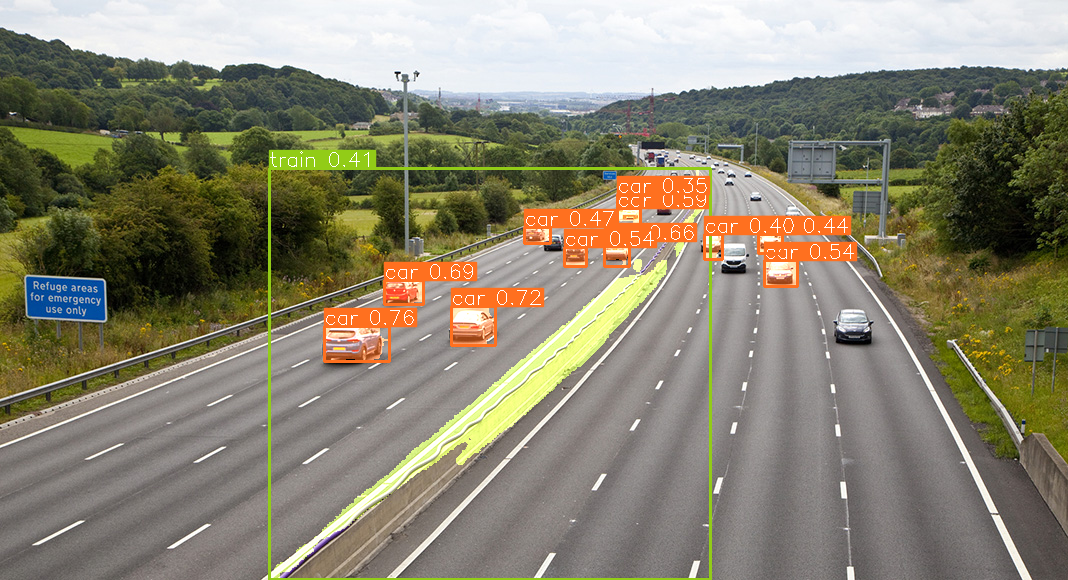

In [9]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

In [10]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model_seg,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 15 slices.


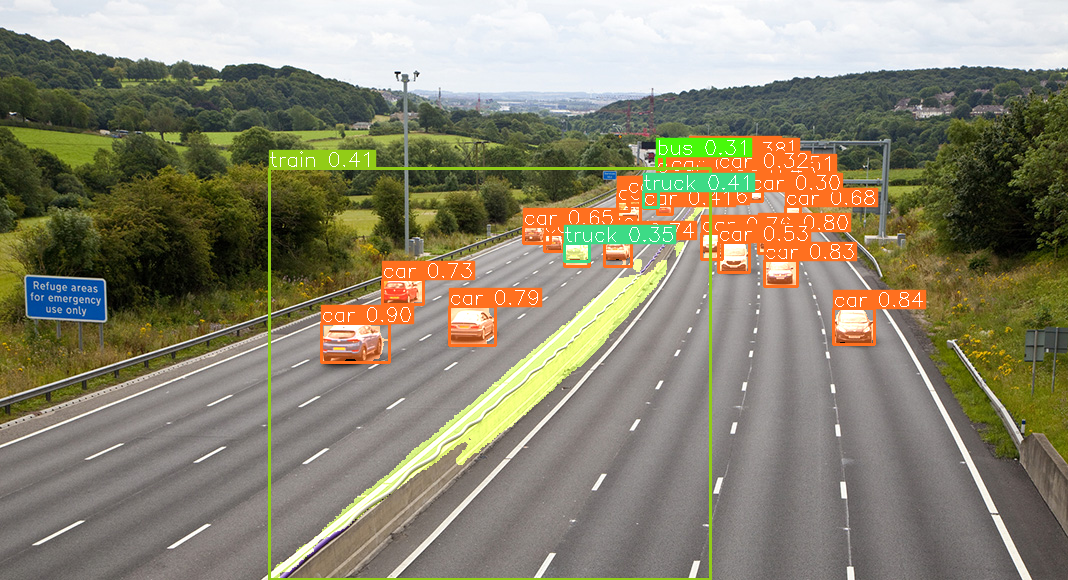

In [11]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

In [12]:
object_prediction_list = result.object_prediction_list
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(321, 323, 389, 362), w: 68, h: 39>,
    mask: <sahi.annotation.Mask object at 0x7f853ca97160>,
    score: PredictionScore: <value: 0.8996676206588745>,
    category: Category: <id: 2, name: car>>

In [13]:
print(object_prediction_list[0])
print(len(object_prediction_list))
print(dir(object_prediction_list))

ObjectPrediction<
    bbox: BoundingBox: <(321, 323, 389, 362), w: 68, h: 39>,
    mask: <sahi.annotation.Mask object at 0x7f853ca97160>,
    score: PredictionScore: <value: 0.8996676206588745>,
    category: Category: <id: 2, name: car>>
32
['__add__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


In [14]:
print(dir(object_prediction_list[0].category))
print(object_prediction_list[0].category.id)
print(object_prediction_list[0].category.name)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', 'id', 'name']
2
car


In [15]:
print(dir(object_prediction_list[0].mask))
print(dir(object_prediction_list[0].mask.segmentation))
print(object_prediction_list[0].mask.segmentation)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', 'bool_mask', 'from_bool_mask', 'from_float_mask', 'full_shape', 'full_shape_height', 'full_shape_width', 'get_shifted_mask', 'segmentation', 'shape', 'shift_amount', 'shift_x', 'shift_y']
['__add__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__'

In [16]:
print(object_prediction_list[0].bbox)
print(dir(object_prediction_list[0].bbox))

BoundingBox: <(321, 323, 389, 362), w: 68, h: 39>
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', 'area', 'get_expanded_box', 'get_shifted_box', 'maxx', 'maxy', 'minx', 'miny', 'shift_amount', 'shift_x', 'shift_y', 'to_coco_bbox', 'to_voc_bbox', 'to_xywh', 'to_xyxy']


# Get Sliced Prediction to Label

## Image

In [17]:
import cv2
import numpy as np
image = cv2.imread("demo_data/small-vehicles1.jpeg")
h, w = image.shape[:2]
for n in range(len(object_prediction_list)) :
    data_points = object_prediction_list[n].mask.segmentation
    data_points = data_points[0]
    data_category_id= object_prediction_list[n].category.id
    # print(data_points)
    # print(data_category_id)
    point = []
    point_group = []
    for eachpoints in range(len(data_points)) :
        if len(point) % 2 == 0 :
            if len(point) != 0 :
                point_group.append(point)
            point = []
        if (eachpoints % 2) != 0:
            # print("{0} - x".format(data_points[eachpoints]))
            point.append(data_points[eachpoints])
        elif (eachpoints % 2) == 0:       
            # print("{0} - y".format(data_points[eachpoints]))
            point.append(data_points[eachpoints])
    # print(point_group)
    pts = np.array(point_group)   # 產生座標陣列
    img = cv2.polylines(image,[pts],True,(0,0,255),1)   # 繪製多邊形

cv2.imwrite('output.jpg', img)


True

## Label txt

In [18]:
import cv2
import numpy as np
image = cv2.imread("demo_data/small-vehicles1.jpeg")
h, w = image.shape[:2]
print(h)
print(w)
point = []
strobj = ''
for n in range(len(object_prediction_list)) :
    data_points = object_prediction_list[n].mask.segmentation
    data_points = data_points[0]
    data_category_id = object_prediction_list[n].category.id
    print(data_points)
    print(data_category_id)

    for eachpoints in range(len(data_points)) :
        if (eachpoints % 2) != 0:
            newx = data_points[eachpoints]/h
            print("{0} - x".format(newx))
            point.append(newx)
        elif (eachpoints % 2) == 0:
            newy = data_points[eachpoints]/w
            print("{0} - y".format(newy))
            point.append(newy)
    strobj = strobj + str(data_category_id) +  " " + ' '.join(str(e) for e in point) + '\n\n'
    # img = cv2.polylines(image,[pts],True,(0,0,255),1)   # 繪製多邊形
file = open('small-vehicles1.txt','w')
file.write(strobj) # Write content information
file.close()

580
1068
[334, 325, 333, 325, 332, 326, 324, 326, 324, 336, 323, 336, 323, 337, 322, 338, 321, 338, 321, 357, 322, 357, 323, 358, 323, 360, 323, 361, 324, 361, 325, 362, 326, 362, 328, 362, 330, 362, 331, 361, 331, 360, 344, 360, 346, 358, 354, 358, 355, 359, 356, 360, 357, 360, 359, 360, 360, 361, 361, 361, 364, 361, 365, 360, 372, 360, 374, 358, 378, 358, 379, 357, 379, 355, 381, 353, 381, 351, 381, 350, 382, 349, 382, 345, 383, 345, 383, 343, 382, 342, 384, 340, 389, 340, 389, 339, 384, 339, 383, 338, 382, 338, 381, 337, 381, 336, 380, 335, 380, 333, 379, 332, 379, 326, 370, 326, 370, 325, 369, 325, 368, 324, 368, 323, 335, 323, 335, 324]
2
0.31273408239700373 - y
0.5603448275862069 - x
0.31179775280898875 - y
0.5603448275862069 - x
0.31086142322097376 - y
0.5620689655172414 - x
0.30337078651685395 - y
0.5620689655172414 - x
0.30337078651685395 - y
0.5793103448275863 - x
0.30243445692883897 - y
0.5793103448275863 - x
0.30243445692883897 - y
0.5810344827586207 - x
0.301498127340824 -